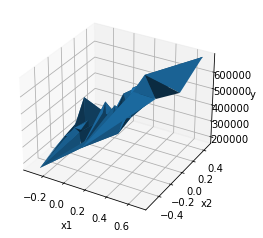

In [79]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('ex1data2.txt',sep=',',header=None)
data = pd.DataFrame(data)
# print(data[0])
# print(data[1])
# print(data[2])

house_size_mean=st.mean(data[0])
#print("Mean: ",house_size_mean)

house_size_max=data[0].max()
house_size_min=data[0].min()

#print("Max: ", house_size_max, "Min: ", house_size_min)

house_size_sd=house_size_max-house_size_min
#print("SD: ", house_size_sd)

x1 = data[0].apply(lambda num : ((num-house_size_mean)/house_size_sd))

house_size_test = (1650-house_size_mean)/house_size_sd


# Second column
bedroom_mean=st.mean(data[1])
#print("bedroom Mean: ",bedroom_mean)

bedroom_max=data[1].max()
bedroom_min=data[1].min()

#print("Max: ", bedroom_max, "Min: ", bedroom_min)

bedroom_sd=bedroom_max-bedroom_min
#print("SD: ", bedroom_sd)


x2=data[1].apply(lambda num : ((num-bedroom_mean)/bedroom_sd))
bed_test = (3-bedroom_mean)/bedroom_sd

y=data[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x1, x2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

y = pd.DataFrame(data[2])

Theta 0 =  340412.6808510636
Theta 1 =  504747.65670428355
Theta 2 =  -34913.01736565226
Final cost =  4513608857615.1
Predicted cost of house  293082.7488243047


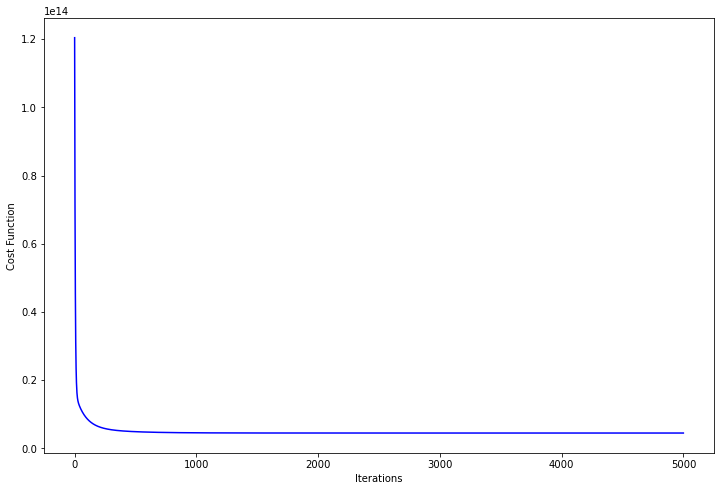

In [81]:
learning_rate=0.1
iter=5000
theta = np.random.randn(3,1)
X = np.c_[np.ones((len(x1),1)),x1,x2]
#print(X)
theta,cost_value,theta_value = gradient_descent_algo(X,y,theta,learning_rate,iter)

print('Theta 0 = ',theta[0][0])
print('Theta 1 = ',theta[1][0])
print('Theta 2 = ',theta[2][0])
print('Final cost = ',cost_value[-1])

fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Cost Function')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter),cost_value,'b-')

#Print the predicted value of house with 1650 sq ft with 3 bedroom

predicted_cost = theta[0][0]*1 + theta[1][0]*house_size_test + theta[2][0]*bed_test

print('Predicted Price using gradient descent')
print('Predicted cost of house ',predicted_cost)




In [31]:
def cost_function(x,y,theta):
    h_x = x.dot(theta)
    n = len(y)
    cost_v = (1/2*n)*np.sum(np.square(h_x-y))
    return cost_v

In [67]:
def gradient_descent_algo(x,y,theta,learning_rate,iter):
    n = len(y)
    cost_value = np.zeros(iter)
    theta_value = np.zeros((iter,3))
    for i in range(iter):
        h_x = x.dot(theta)
        theta = theta - (1/n)*learning_rate*(x.T.dot(h_x-y))
        theta_value[i] = theta.T
        cost_value[i] = cost_function(x,y,theta)
    return theta,cost_value,theta_value   

In [82]:
#Using normal equation 

x_transpose = np.transpose(X)   #calculating transpose
x_transpose_dot_x = x_transpose.dot(X)  # calculating dot product
temp_1 = np.linalg.inv(x_transpose_dot_x) #calculating inverse

temp_2 = x_transpose.dot(y)  

Ɵ = temp_1.dot(temp_2)


predicted_cost_normal_equation = Ɵ[0]*1 + Ɵ[1]*house_size_test + Ɵ[2]*bed_test

print('Predicted Price using Normal Equation')
print('Predicted cost of house ',predicted_cost_normal_equation)


Predicted Price using Normal Equation
Predicted cost of house  [293081.47383519]
